# 1. 환경준비

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

In [2]:
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/iris.csv'
data = pd.read_csv(path)

# 2. 데이터 이해

In [3]:
data.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [4]:
data.isna().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [5]:
data['Species'].value_counts()

virginica     50
versicolor    50
setosa        50
Name: Species, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


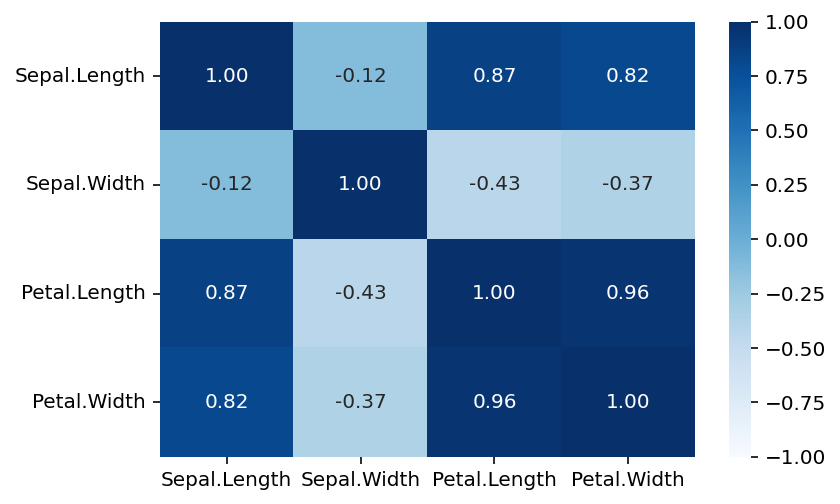

In [10]:
import seaborn as sns

corr = data.corr()

sns.heatmap(corr, annot=True, fmt='.2f',
            vmax=1, vmin=-1,
            cmap='Blues')
plt.show()

# 3. 데이터 분리

#### 1) x,y 분리

In [11]:
target = 'Species'

x = data.drop(target, axis=1)
y = data[target]

#### 2) train, test 분리

In [37]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

# 4. 모델링 

In [38]:
# 1단계 : 불러오기
from sklearn.tree import DecisionTreeClassifier

In [39]:
# 2단계 : 선언하기
model = DecisionTreeClassifier()

In [40]:
# 3단계 : 학습하기
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [41]:
# 4단계 : 예측하기
y_pred = model.predict(x_test)

# 5. 성능평가

#### 1) 혼동행렬

In [42]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  1, 15]], dtype=int64)

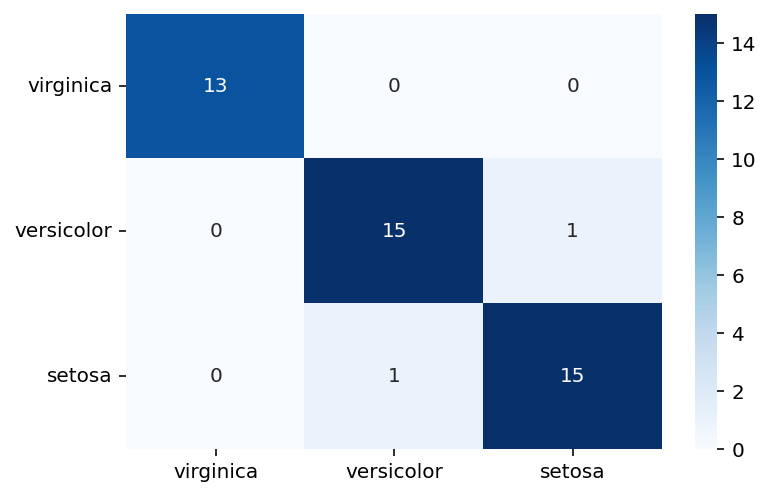

In [43]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='Blues')

plt.xticks([0.5,1.5,2.5], ['virginica', 'versicolor', 'setosa'])
plt.yticks([0.5,1.5,2.5], ['virginica', 'versicolor', 'setosa'], rotation=0)

plt.show()

#### 2) 정확도(accuracy)

In [18]:
# 5단계 : 평가하기
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

#(TP + TN) / (TP + TN + FP + FN)

0.9777777777777777

#### 3) 재현율(recall) = 민감도(sensitivity)

In [20]:
from sklearn.metrics import recall_score

recall_score(y_test,y_pred, average=None)

# TP / (TP + FN)


# y가 0,1이 아닌 단어이기때문에 인식을 못해서 평균을 내지 못함.
# 평균을 구하지 않게 해줘야함.

array([1.        , 0.93333333, 1.        ])

#### 4) 정밀도

In [23]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred, average=None)

# TP / (TP + FP)

array([1.        , 1.        , 0.94117647])

#### 5) F1 score

In [25]:
from sklearn.metrics import f1_score

f1_score(y_test,y_pred, average=None)

# (2 * recall * precision) / (recall + precision)

# 모델의 설명력을 나타내줌

array([1.        , 0.96551724, 0.96969697])

#### 6) classification report

In [45]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

# macro avg : 평균
# weighted avg : 가중치에 대한 평균 -> 1*13/45 + 0.94*16/45 + 0.94*16/45

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.94      0.94      0.94        16
   virginica       0.94      0.94      0.94        16

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

